###ANSWER
(for making sure this gets removed)

### INSTRUCTOR CONTENT -- REMOVE THIS IN STUDENT VERSION
#### The goals/notes for this class are:

* The original goal for this assignment was for the students to spend some time grappling with the challenges of building a KNN algorithm from scratch to follow off of the idea presented in the pre-class about trying to ensure that cell phone towers to not end up with too much overlapping frequency.
* The KNN algorithm ends up being quite challenging for some students, which can lead to this being a frustrating day. It might be worth trying to guide this assignment a little bit more by suggesting that they create distance matrix using SciPy and then have them figure out how to use their distance matrix to find the KNN neighbors, giving them this piece still makes them figure out the "tricky" part of the algorithm, but might avoid situations where students head down a path to nowhere. If students can get the KNN stuff working more quickly. That should give them more time playing with the visualization part of the assignment, which should lead to a more satisfying result.

#### In-class meta-messaging:

* Use the beginning of class to discuss issues that came up in the pre-class survey. For questions about how to solve the nearest-neighbor question, you can point out that one possible solution is include in the notebook and walk the class through that solution
* Explain to students that the KNN algorithm might take them a bit of time to figure out.
* Explain that while we're thinking about KNN as being a tool for identifying neighbors based on physical separation, this could be applied to any sort of feature space, which is worth thinking about from a machine learning context.
* If they run out of time, there might be an opportunity to revisit this in the next class period.

# In-class Assignment: Graph Theory and Cell Towers
# Day 11
# CMSE 202

In this assignment you will work with your group to develop a program to use a color graphing algorithm to select frequencies for cell towers around MSU.  There are four major parts to this assignment.  Try to make sure you get through all of it, but don't stress too much if you don't finish.

### Agenda for today's class:

1. [Part 1: Download and import the data](#p1)
2. [Part 2: K-nearest neighbor graph](#p2)
3. [Part 3: Greedy graph coloring](#p3)
4. [Part 4: Plotting towers and their colors on a map](#p4)

### <p style="text-align: right;"> &#9989; **Put your name here** </p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>

---
# Problem Statement

**As was presented in the pre-class assignment**, the signals from different cellphone towers that are close together can interfere.  

<img src="http://2.bp.blogspot.com/-X7XJfnPb6xU/TjZfTmAd9CI/AAAAAAAAAF0/3eGarXigOQE/s1600/dido1.jpg" width="500px"><p style="text-align: right;">From: http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

In order to avoid this overlap cell phone companies use different frequency ranges in the Electromagnetic spectrum.  Two towers that are close together but have differences in frequencies (shown as colors, red/green/black in the following figure) do not cause nearly as much interference. 

<img src="http://2.bp.blogspot.com/-M4olRy6O-v4/TjZghvwq3KI/AAAAAAAAAF4/GtOd6Db-su4/s1600/dido2.jpg" width = "500px"><p style="text-align: right;">From:  http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

However, cellphone towers are never distributed in such an even pattern.   Consider the following map which shows the location of cell towers around Michigan State.

<img src='https://i.ibb.co/jv2vLBr/MSU-Towers.png' width = "500px">
<p style="text-align: right;">From: http://www.antennasearch.com/</p>

Another problem is that cellphone companies have to pay for each frequency range they use.  So they would like minimize the number of frequencies that they need to purchase while also minimizing the interference between the cell towers. 

In this assignment you are going to work as a group to solve this problem using graph coloring.

---
<a id="p1"></a>
## Part 1: Download and import the data

We will be using antenna data from the following website:

http://www.antennasearch.com/

**&#9989;  Do This:** We previously downloaded a CSV file from this website for all of the **towers** in a 3 Mile radius from the MSU engineering building (428 S Shaw Lane, East Lansing, MI 48824). **You can download this file from here:**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/TowersYYH730463QHM18572.csv`

Make sure that the downloaded file is in the same directory as your in-class notebook.

**Optional**: Feel free to try running the same search and take a look at just the **towers**. When you start to visualize the data in the file we've shared you can see if any new towers have been added since the data was last pulled.

Finally, **write code** to load the file into Python and generate a list of longitude and latitude for the towers.

In [1]:
# Put your function here!


In [2]:
### ANSWER ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('TowersYYH730463QHM18572.csv')
data.head(5)
points = np.stack((data['longitude'].values, data['latitude'].values), axis=1)
points.shape

## OR

import matplotlib.pyplot as plt
import numpy as np
import csv

csvfile = 'TowersYYH730463QHM18572.csv' # Note that you need a file for this to work
tower_data = csv.reader(open(csvfile, 'r'), delimiter=',', quotechar='"')
rows=[]
for row in tower_data:
    rows.append(row)

latitude = 3
longitude = 4

points = np.zeros([len(rows)-1,2])

for i in range(1,len(rows)):
    points[i-1, 1] = float(rows[i][latitude])
    points[i-1, 0] = float(rows[i][longitude])
### ANSWER ###

**&#9989;  Do This:** Generate a plot similar to the following showing the towers on the x-y plane.

<img src="https://i.ibb.co/bd2g2Hf/tower-graph.png">


In [ ]:
# Put your plotting code here.


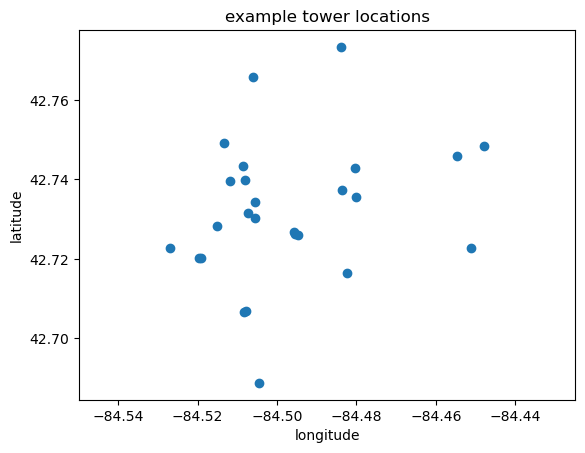

In [4]:
### ANSWER ###
plt.scatter(points[:,0], points[:,1])
plt.axis('equal')
#plt.scatter(points[25,0], points[25,1], color='green')
plt.title('example tower locations')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.axis('equal');
#plt.savefig('./images/tower_graph.png')
### ANSWER ###

&#9989; **Question 1**: By default `matplotlib.pyplot.scatter` will scale the x-axis and y-axes to best fit the points. However, sometimes (as is the case here) we want the scaling of both axes to be equal.  What command can you use for the above plot to ensure that the distances are the same in the x-direction as the y-direction?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---
<a id="p2"></a>
## Part 2: Generating a K-Nearest Neighbor Graph

In the pre-class assignment, you were asked to try and write an algorithm that found the nearest neighbor for every point in a collection of points. There's not necessarily one right way to solve this problem, so your solution might have looked quite a bit different this (or perhaps you didn't quite get things working), but here's one possible solution:

In [6]:
# Possible solution for the nearest-neighbor algorithm
import math
def distance(p1,p2):
    '''Returns the distance betwen two numpy points'''
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
def nearest_neighbors(points):
    '''Generates an adjacency list based on the Nearest neighbor graph algorithm.'''
    G = dict()
    for p in range(0,len(points)):
        min_distance = np.inf
        min_point = -1
        for n in range(0,len(points)):
            if p != n:
                d = distance(points[p], points[n])
                if d < min_distance:
                    min_distance = d
                    min_point = n
        if min_point == -1:
            print("ERROR-point not found")
        G[p] = [min_point]
    return G

**But what if we wanted to find the nearest *2* neighbors? The nearest 3? More?**

**&#9989;  Do This:** Next **write a function that generates a graph using the k-nearest neighbor graph algorithm**.  More information about the nearest neighbor and k-nearnest neighbor algorithm can be found here:

https://en.wikipedia.org/wiki/Nearest_neighbor_graph

The KNN graph is very similar to the nearest neighbor graph you did in the pre-class assignment. However, now instead of only finding the closest point to each point you find the k-closest points.

**Important note**: While the nearest-neighbor and KNN problems are similar, the same approach may not work well for both solutions! You should think this through and talk about it with your group. **How will you tackle this problem?**

In [ ]:
# Put your k-nn function here


{0: array([25, 12,  5]), 1: array([ 6, 12,  5]), 2: array([23, 10, 22]), 3: array([18,  4, 19]), 4: array([19, 18, 21]), 5: array([12,  9,  1]), 6: array([21, 22,  1]), 7: array([11, 24, 20]), 8: array([ 0, 25, 12]), 9: array([ 5, 12,  1]), 10: array([23,  2, 13]), 11: array([ 7, 24, 20]), 12: array([5, 9, 1]), 13: array([10,  2, 23]), 14: array([13, 10, 15]), 15: array([14, 20, 17]), 16: array([17, 20, 18]), 17: array([16, 20, 18]), 18: array([ 4, 19, 21]), 19: array([ 4, 18, 21]), 20: array([17, 16, 18]), 21: array([ 6, 22,  1]), 22: array([ 6, 21, 23]), 23: array([10,  2, 22]), 24: array([11,  7, 16]), 25: array([ 0, 12,  5])}


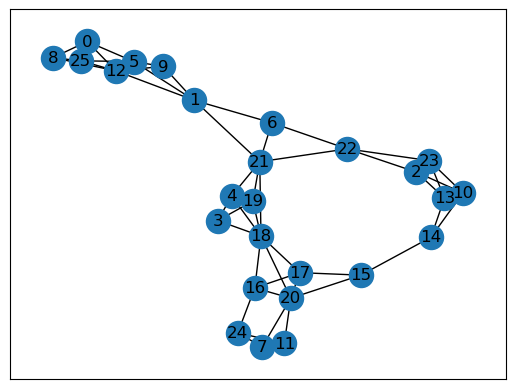

In [8]:
### POSSIBLE ANSWER ###
### I think this solution is much cleaner than the third one below (which might actually have a bug) and leverages a distance matrix in a useful way.
### However, it requires knowledge of the distance_matrix function in scipy.spatial, which is not covered in the course as well as the argsort function in numpy.
### Nudging students toward this approach may move then through the problem a bit more quickly though

# Put your k-nn function here
from scipy.spatial import distance_matrix

def KNN(k,points):
    G = {}
    matrix = distance_matrix(points,points)
    for i in range(0,len(matrix)):
        k_values = []
        distances = matrix[i]
        indexmin = np.argsort(distances)
        k_values = indexmin[1:k+1]
        G[i] = k_values
    return G

G = KNN(3,points)
print(G)

import networkx as nx
G = nx.Graph(G)
nx.draw_networkx(G)

{0: [25, 12, 5], 1: [6, 12, 5], 2: [23, 10, 22], 3: [18, 4, 19], 4: [19, 18, 21], 5: [12, 9, 1], 6: [21, 22, 1], 7: [11, 24, 20], 8: [0, 25, 12], 9: [5, 12, 1], 10: [23, 2, 13], 11: [7, 24, 20], 12: [5, 9, 1], 13: [10, 2, 23], 14: [13, 10, 15], 15: [14, 20, 17], 16: [17, 20, 18], 17: [16, 20, 18], 18: [4, 19, 21], 19: [4, 18, 21], 20: [17, 16, 18], 21: [6, 22, 1], 22: [6, 21, 23], 23: [10, 2, 22], 24: [11, 7, 16], 25: [0, 12, 5]}


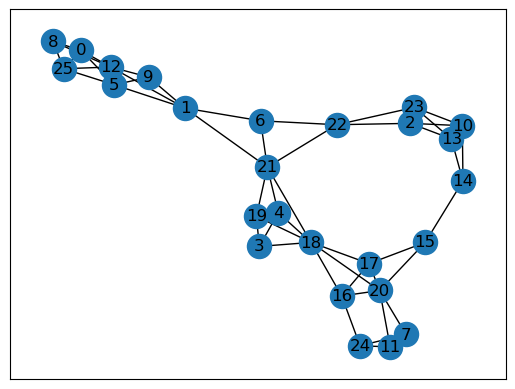

In [10]:
### ALTERNATE ANSWER ###
# This builds on the nearest neighbor algorithm above, but stores a list for each dictionary key instead of a single value.
# This is an approach that might be more common for the students to think of, but it is a bit more complicated to implement.

def KNN(k, points):
    G = {}
    for i in range(len(points)):
        temp_dict = []
        for j in range(len(points)):
            if i != j:
                distance = ((points[i][0]-points[j][0])**2 + (points[i][1]-points[j][1])**2)**.5
                temp_dict.append([distance,j])
        sorted_list = sorted(temp_dict)
        temp_list = []
        for val in sorted_list[:k]:
            temp_list.append(val[1])
        G[i] = temp_list
    return G
G = KNN(3, points)
print(G)
import networkx as nx
G = nx.Graph(G)
nx.draw_networkx(G)

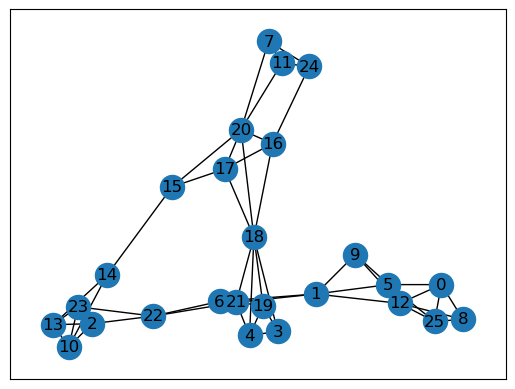

In [12]:
### ANOTHER POSSIBLE ANSWER -- CAUTION, I THINK THERE MAY BE A BUG IN THIS CODE ###
# This solution is maintained in case students try to go this route.

#Knn graph#

import networkx as nx
import math

G=nx.Graph()

def distance(p1,p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

k = 3
for p in range(0,len(points)):
    G.add_node(p)
    min_distance = np.inf
    min_point = -1
    distances = []
    indexs = range(0,len(points))
    for n in indexs:
        distances.append(distance(points[p], points[n]))

    distances, indexs = zip(*sorted(zip(distances, indexs)))
    for i in range(1,k+1):
        G.add_edge(p, indexs[i])
### ANSWER ###
nx.draw_networkx(G)

**&#9989; Do This:**  It is important to test code.  How do you know if your K-NN algorithm is working? Trying writing a function that tests if your code is right. Try changing the inputs and the values for ```k``` and make sure it behaves correctly. One important test would be ensuring it works when *k=1* as this should reproduce the nearest neighbor graph.

In [ ]:
# Put some testing code here


**&#9989; Do This:** Using the tower locations from Part 1, generate a figure similar to the following:

<img src="https://i.ibb.co/1dd1rz9/knn-graph.png">  

While the above graph displays the network, clearly not a lot of attention was given to the aesthetics!

In [ ]:
# Put the code that makes your cell tower plot here


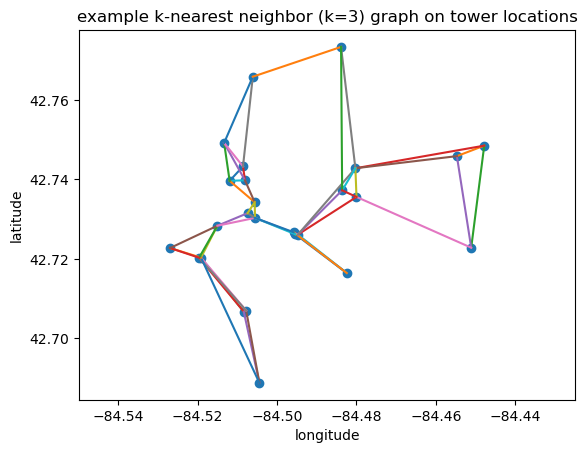

In [14]:
### ANSWER ###
#plt.triplot(points[:,0], points[:,1], tri.simplices.copy());
plt.plot(points[:,0], points[:,1], 'o')
for edge in G.edges():
    x = [points[edge[0],0], points[edge[1],0]]
    y = [points[edge[0],1], points[edge[1],1]]
    plt.plot(x,y)
plt.axis('equal')
plt.title('example k-nearest neighbor (k=3) graph on tower locations')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.axis('equal');
#plt.savefig('./images/knn_graph.png')
### ANSWER ###

---
<a id="p3"></a>
## Part 3: Greedy Graph Coloring

Next we will run a greedy graph coloring algorithm on your K-NN graph with k = 3 and plot the towers in the x-y plane colored to match the frequency selected. For example:

<img src="https://i.ibb.co/mFwd72V/knn-color-graph.png">

**&#9989; Do This:** Using networkx, apply the "greedy" graph coloring algorithm to the K-NN graph (K=3) developed in part 2 of the tower data downloaded in part 1.  

In [ ]:
# Plot your colored cell tower graph here.


{18: 0, 12: 0, 21: 1, 20: 1, 5: 1, 1: 2, 0: 2, 25: 3, 2: 0, 23: 1, 10: 2, 22: 2, 4: 2, 19: 3, 13: 3, 17: 2, 16: 3, 6: 0, 3: 1, 9: 3, 7: 0, 11: 2, 24: 1, 8: 1, 14: 0, 15: 3}
[2, 2, 0, 1, 2, 1, 0, 0, 1, 3, 2, 2, 0, 3, 0, 3, 3, 2, 0, 3, 1, 1, 2, 1, 1, 3]


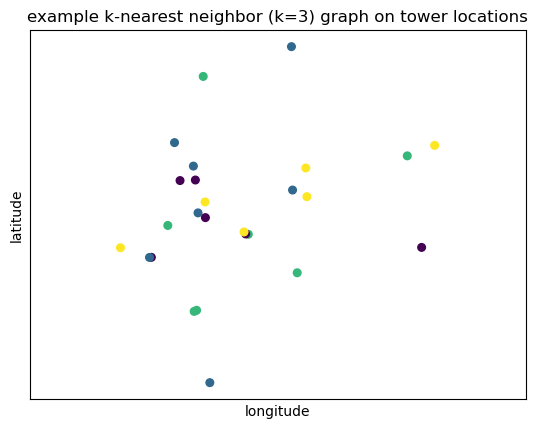

In [16]:
### ANSWER ###

# Either one of these lines work
d = nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
d = nx.algorithms.coloring.greedy_color(G,strategy="largest_first")
print(d)

# Define a position dict for points
points_d = {}
for i,p in enumerate(points):
    points_d[i] = p

# Sort the keys for defining the color array
sorted_d_keys = sorted(d.keys())

# Loop through sorted keys and assign colors
d_colors = []
for k in sorted_d_keys:
    d_colors.append(d[k])
print(d_colors)

nx.draw_networkx_nodes(G,pos=points_d, node_color=d_colors,
                 node_size=30)
plt.axis('equal')
plt.title('example k-nearest neighbor (k=3) graph on tower locations')
plt.xlabel('longitude')
plt.ylabel('latitude');
#plt.savefig('./images/knn_color_graph.png')

---
<a id="p4"></a>
## Part 4: Plot tower colors on a map
Finally plot the towers on a map and set the marker colors to your individual frequency colors. Something like the following:

<img src="https://i.ibb.co/Rvx2rJn/Screen-Shot-2021-02-22-at-10-01-20-PM.png" width="800px">

**Note**: In order to overlay the tower locations as points on map, you'll like need to find a python package that can help you do this. We explored some such options in a previous class period!

**&#9989; Do This:** First, write some test code to generate a map with colored points using whatever package you chose to use.

In [ ]:
#Put your test code here


**&#9989; Do This:** Finally, put it all together.  Generate a map with markers colored based on the frequencies selected in the graph coloring algorithm in part 3.  Use the K-NN graph with ```k=3``` generated from part 2 of the tower data downloaded from part 1. 

In [ ]:
# Put your map code here


In [18]:
### ANSWER ###
import folium

val_map = {0: 'green',
           1: 'red',
           2: 'blue',
           3: 'purple'}

map_msu = folium.Map(location=[42.7370, -84.4839])
for i in range(0,len(points)):
    folium.Marker([points[i,1],points[i,0]], icon=folium.Icon(color=val_map[d[i]])).add_to(map_msu)
map_msu

----

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University